# Milestone 1

- Name : Rahmat Fadhli Syauqi
- Batch : FTDS011

URL Backend : 

URL Frontend : 

## I. Introduction

This project is meant for fulfilling Hacktiv8 Fulltime Datascience Bootcamp Milestone-1 Phase 2 assignment.

In this project, I will try to create artificial neural network in Learning prediction model using several Supervised Learning algorithm that is available in Tensorflow library and with Keras.

**I.2 Dataset Description**

This dataset contains Telco Customer Churn. Some the data will be treating this as a binary classification problem, where we will attemp to create a model that predicts a customer will churn or not, it means the customer has no longer subscribed to the service.

And the dataset we collected from Kaggle "https://www.kaggle.com/datasets/blastchar/telco-customer-churn".

**I.3 Data Set Information:**

This datase contains the following information of telco company that provides home phone and internet services for customers, which customers will churn or stay for the service.

- customerID: Unique ID of each customer
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharge: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer

**Target Values**

- Churn: Whether the customer has no longer subscribed to the service (Yes or No)

**I.4 Objectives**

The objective from this project is to build predictive model with Artificial Neural Network from the dataset that we collected from Kaggle. To predict customer who has no longer subscribed to the service and stay.

After that we need to analyze the model and try to improve it. If we fail to predict the custome that has no longer subscribed to the service, the company will lose amount of money that they have from previously revenue.

---
# II. Import Libraries

In [16]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('fivethirtyeight')

# Data Preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.data import Dataset
from dython.nominal import associations

# Model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization, concatenate, Dropout
from tensorflow import keras

# Metric
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Deployment
import pickle

import warnings
warnings.filterwarnings("ignore")

---
# III. Data Loading

In [17]:
# Load Data and save it in `df_og` variable
df_train_test = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Make copy from the df
df = df_train_test.copy()

**Dataset Preview**

In [18]:
# Show the dataset
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# Show dataset from the last 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [20]:
# Dataset Shape
df.shape

(7043, 21)

In [21]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
# Null value summary
df.isnull().sum().sort_values()

customerID          0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
TotalCharges        0
OnlineBackup        0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
OnlineSecurity      0
Churn               0
dtype: int64

In [23]:
# Dataset Check
df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,29.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,70.35,118.75


In [24]:
# Dataset Check for Categorical
df.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Insight from Dataset Preview process:

Based on above process, I get these information:
- Dataset contains of 7043 rows and 21 columns 
- There are 1 features float type , 2 features integer type and 18 features that is object type
- There are no missing value on this dataset 
- There are no strange value on numerical features but there are somethin strange on 'TotalCharges' features that has empty value
- 'SeniorCitizen' feature has value 1 or 0 that we can use this for categorical as binary classification.

---
# IV. Exploratory Data Analysis

**Preparation**

In [25]:
# Create preset palette
palette = {"Yes" : '#014F9D', "No" : '#DB0707'}

In [26]:
# Feature Categorization
num_col = ['tenure','TotalCharges','MonthlyCharges']
cat_col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

**Preliminary Check**

Before going deep into the dataset, Let's generaly check the dataset. 
First of all we will check if data has duplicate value or not and we need to determine the information some features that we need to use.

In [27]:
# Duplicate entry check
df.duplicated().sum()

0

First of all from dataset we have, there is one features that has no correlation with the target values and has many unique values and has nothing to do with Churn, so we need to drop that feature.

In [28]:
# Drop `customerID` column
df.drop(['customerID'], axis=1, inplace=True)

So there are no duplicate values on our dataset, so we can continue to out next step.

In [29]:
# Checking Feature
# Feature : InternetService
# Description : Customer’s internet service provider (DSL, Fiber optic, No)

var = 'InternetService'

print('variable:', var)
print('null values count: ', df[var].isnull().sum())
print('Unique values Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: InternetService
null values count:  0
Unique values Count: 3

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


From this features we have 3 uniques values that contains type of internet service from this telco company, so we can check the next features that has suspicious value.

In [30]:
# Checking Feature
# Feature : TotalCharges
# Description : The total amount charged to the customer

var = 'TotalCharges'

print('variable:', var)
print('null values count: ', df[var].isnull().sum())
print('Unique values Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: TotalCharges
null values count:  0
Unique values Count: 6531

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64


Based on the result as we can see "TotalCharges" has numerical type but the data type input as a object type, so there are some missing values on this features that contain as ' ' (empty value). We need to convert this blank space into NaN and convert to float type.

In [31]:
# Converting blank space into NaN values
df['TotalCharges'].replace(' ', np.nan, inplace=True)


In [32]:
# Converting to float type
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [33]:
# Confirmation Check
df['TotalCharges'].dtypes

dtype('float64')

In [34]:
# Features re-Check
# Feature : TotalCharges
# Description : The total amount charged to the customer

var = 'TotalCharges'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: TotalCharges
null value count:  11
Unique Value Count: 6530

Descriptive stats:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


So we already convert the data type of 'TotalCharges' to float type. But we still have missing value on this feature we can handle later, now we can continue to explore more from this dataset.

**Univariate Analysis**

In this part of sub-process, I'll try to plot the histogram of numerical features and see the distribution of each feature.

Since our target parameter is **'Churn'**, let's get to know about it more deeply.

In [35]:
# Number of unique value
print(df['Churn'].value_counts())
print()
print(df['Churn'].value_counts(normalize=True)*100)

No     5174
Yes    1869
Name: Churn, dtype: int64

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


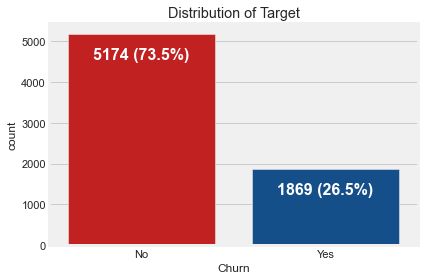

In [36]:
# Distribution Check

ax = sns.countplot(df['Churn'], palette=palette, )
    
ax.set_title("Distribution of Target")
# Annot bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + " (" + format(p.get_height()*100/len(df), '.1f') + "%)",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, -25), 
        textcoords = 'offset points',
        color = 'white'
    )
plt.tight_layout()

plt.show()

From this as we can see, the target parameter is categorical value so we can convert it to binary number to make easier for train model, and from this feature we have imbalance data that has "No" class more 70% and "Yes" class 26%.

In [37]:
# Temporal encoding for target variable for analysis purpose
df['Churn_encode'] = df['Churn'].map({'Yes': 1, 'No': 0})

**Bivariate/Multivariate Analysis**

The purpose of bivariate analysis is to understand the relationship between two or more variables.

n this part of sub-process, I will try to explore some facts inside the dataset with **'Churn'** variable as my focus.

In [38]:
# Create function for boxplot
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="tab10",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

**Service Analysis**

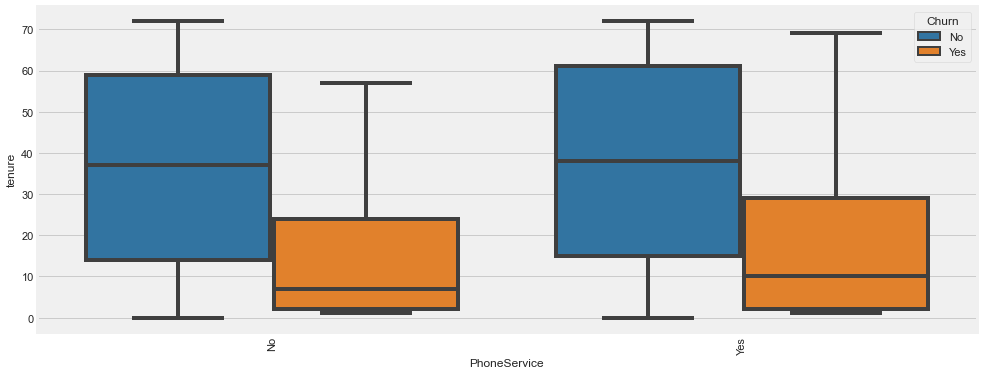

In [39]:
# Show boxplot graph of PhoneService ,tenure & Churn
boxplot_variation('PhoneService','tenure', 'Churn',15)

From this graph we can know customer who has will not churn has long tenure for subscribtion so this type of customer will always stay for the service.

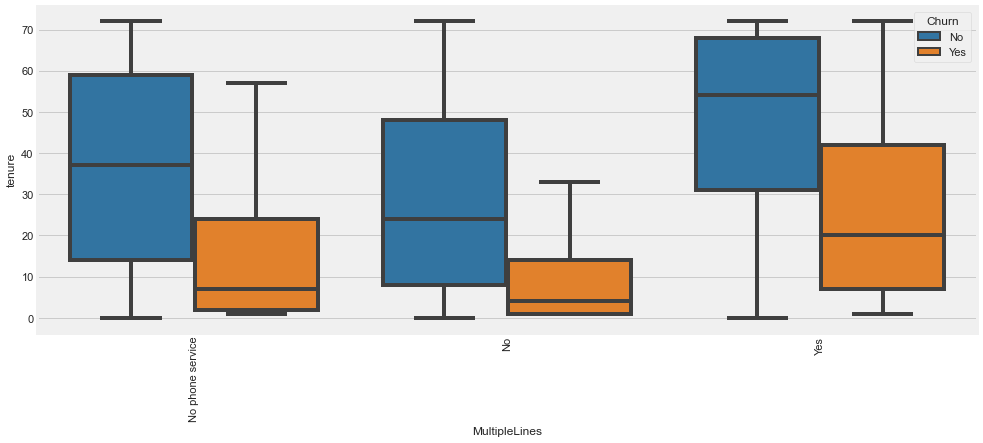

In [40]:
# Show boxplot graph of MultipleLines ,tenure & Churn
boxplot_variation('MultipleLines','tenure', 'Churn',15)

From this graph we have correlation between PhoneService and MultipleLines, on there is high amount of Churn rate on category No phone service, maybe the customers who has long term subscriptions want have included phone service. From this we can drop PhoneService feature because there consist on MultipleLines feature.

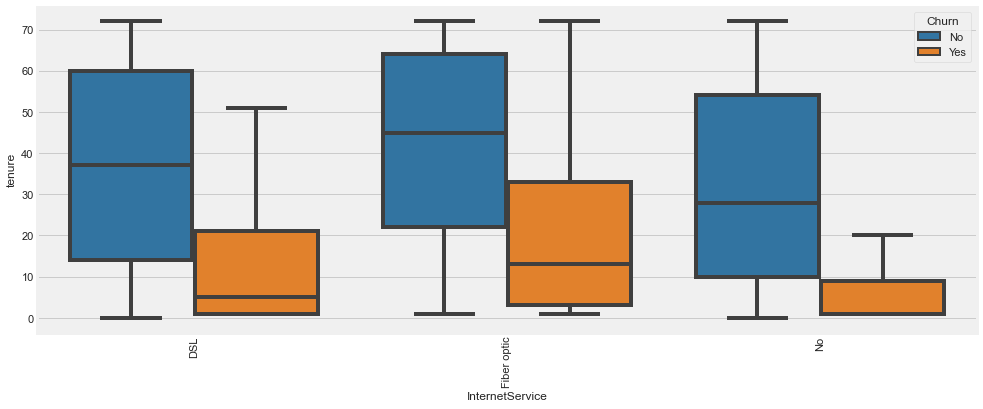

In [41]:
# Show boxplot graph of InternetService ,tenure & Churn
boxplot_variation('InternetService','tenure', 'Churn',15)

Same as before we can see that the customer has short term tenure for the service, considering they can churn the service excepet customer who has long term tenure, and customer who has not internet service likely will churn on short term.

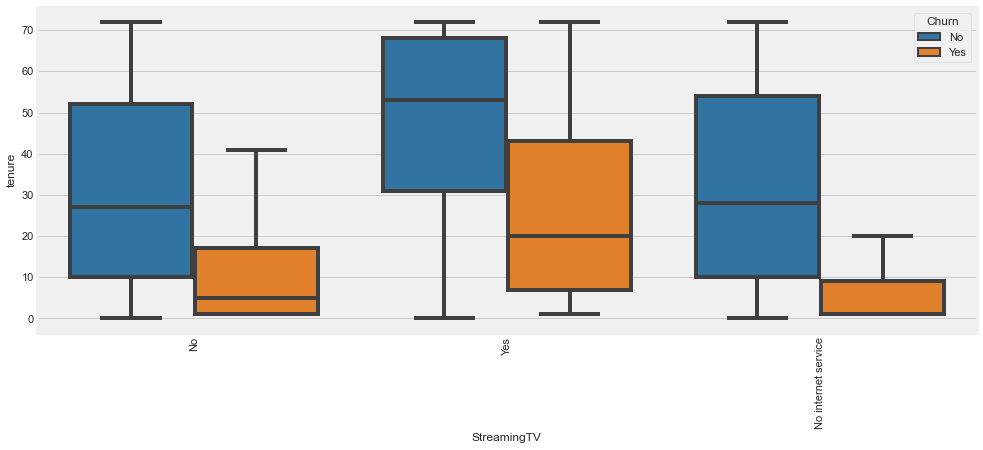

In [42]:
# Show boxplot graph of StreamingTV ,tenure & Churn
boxplot_variation('StreamingTV','tenure', 'Churn',15)

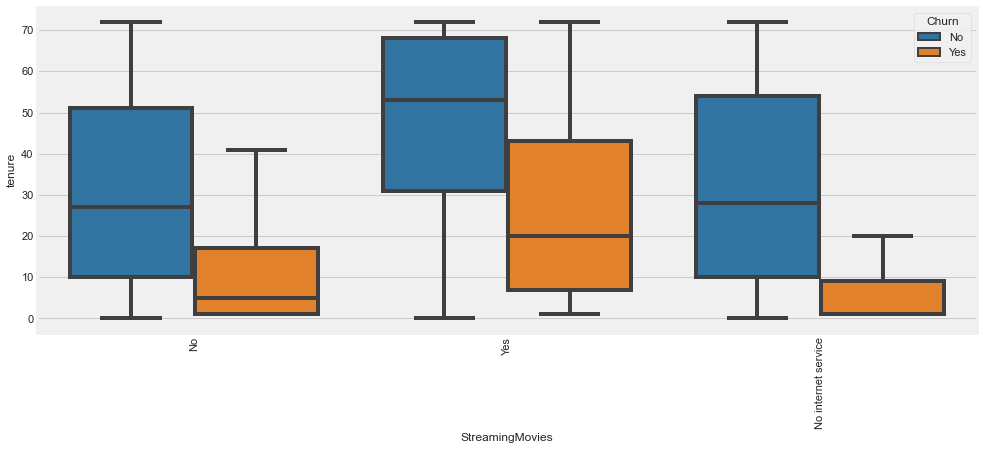

In [43]:
# Show boxplot graph of StreamingMovies ,tenure & Churn
boxplot_variation('StreamingMovies','tenure', 'Churn',15)

From both graph on StreamingMovies & StreamingTV we has similar amount of churn rate, so we can drop StreamingMovies feature because is quite similar with StreamingTV feature.

**Customer Analysis**

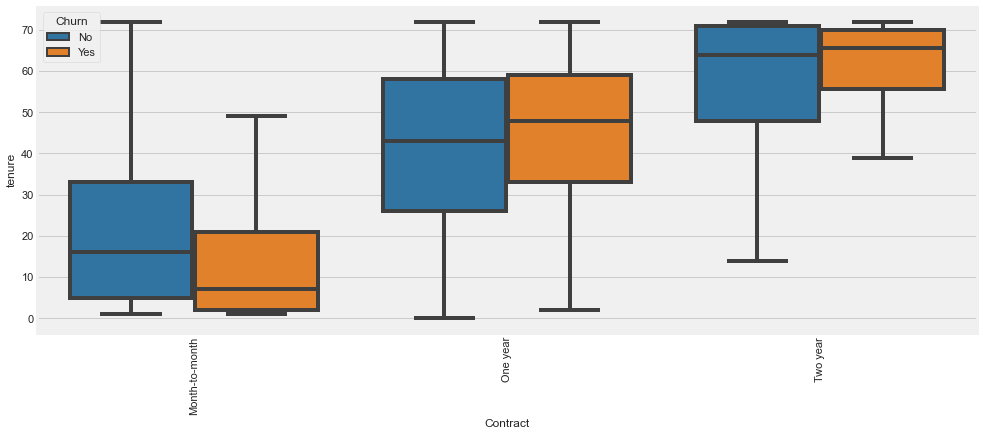

In [44]:
# Show boxplot graph of Contract ,tenure & Churn
boxplot_variation('Contract','tenure', 'Churn',15)

From we see on class which customer will be Churn, on category Contrac Month-to-month customer will likely stop subscribe on short term tenure, and on category One year & Two year customer will likely stop subscribe on long term tenure.

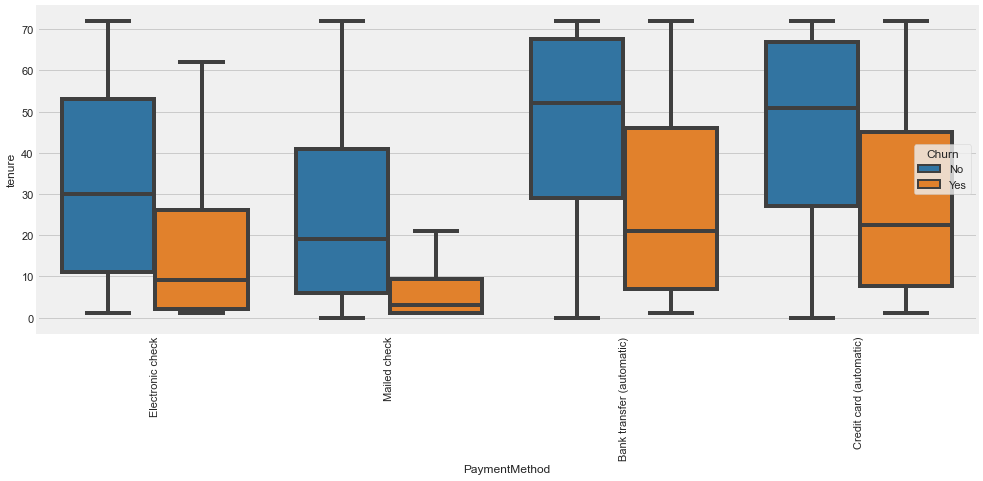

In [45]:
# Show boxplot graph of PaymentMethod ,MonthlyCharges & Churn
boxplot_variation('PaymentMethod','tenure', 'Churn',15)

From this chart we can know customer who hase payment method on Mailed Check will likely churn on short term tenure, and customer who has payment method on Electronic Check, Automatic Payment will likely churn on long term tenure. So the custome who has Mailed method will churn maybe because the customer forget to pay the bill.

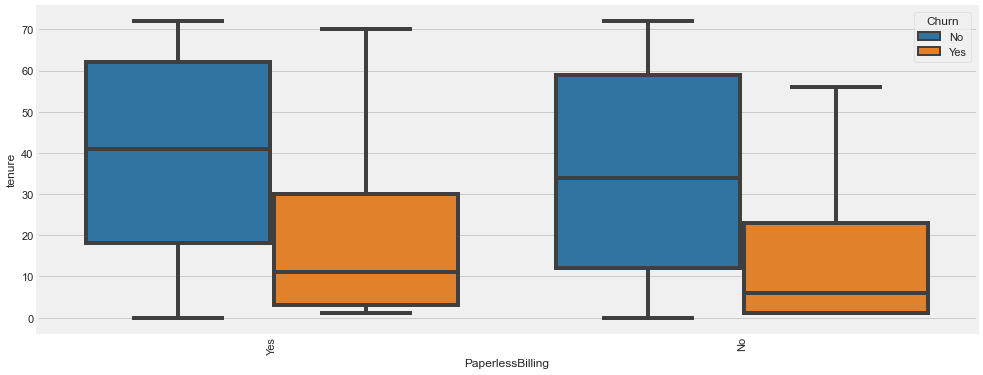

In [46]:
# Show boxplot graph of PaperlessBilling ,tenure & Churn
boxplot_variation('PaperlessBilling','tenure', 'Churn',15)

Both of category has the same balance data, from this we can see more customer who has not churn for the subscriber will likely stay for the service.

Cause we already look correlation between each input variables to target variable, now we need to explore more map correlation from every parameter and we need to plot it in a graph.

**Numerical Feature Selection**

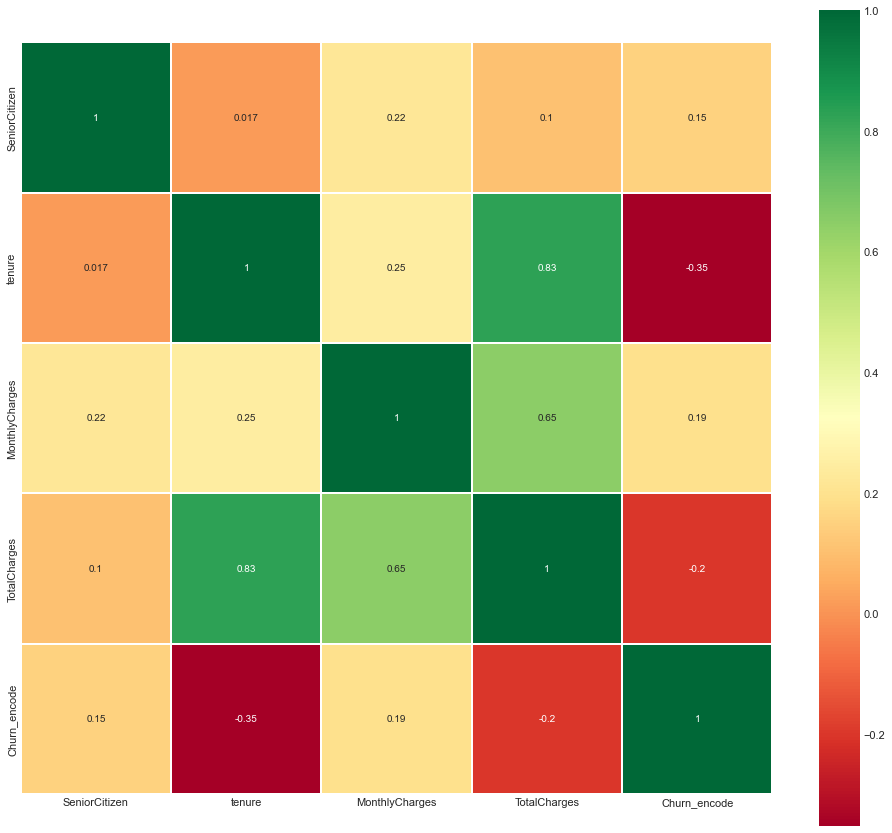

In [47]:

# Checking correlation between each variables

# Heatmap
corrmat = df.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(15,15))

g = sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap='RdYlGn', square=1, linewidths=0.05)

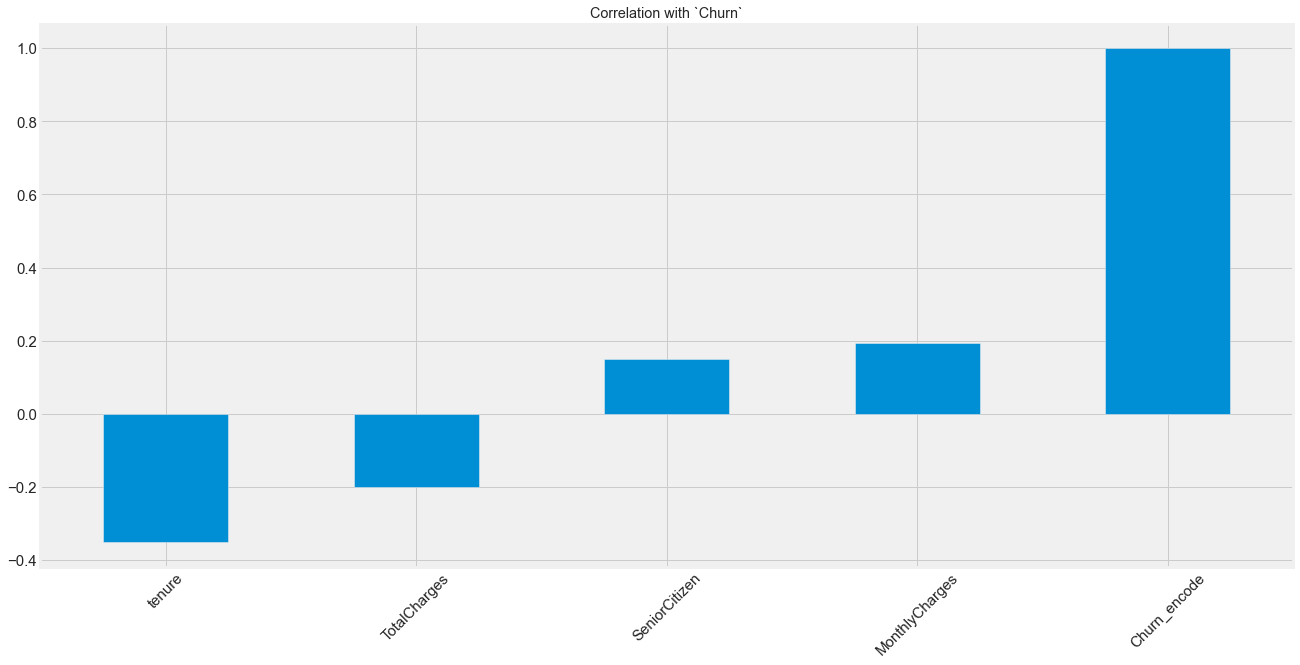

In [48]:
# Checking correlation between target variable and input variables

df.corrwith(df['Churn_encode']).sort_values().plot.bar(figsize=(20,10), title='Correlation with `Churn`', fontsize=15, rot=45, grid=True)
plt.show()

Based on graph above, I can summarize top features that correlate with **Churn** target label:

- tenure & TotalCharges has negative correlation with churn, but we can drop either TotalCharges, because ther is still similar correlation with MonthlyCharges
- So we have small correlation between target value and other numerical features, i'd like to include all of these columns.


---
# V. Data Preprocessing

In this process I split my dataset into train, test, and validation set

**Dataset Splitting**

In this process, I will split my dataset into different set:

- Use 80% from dataset for Train Set
- Use 20% from dataset for Test Set
- Use 20% from dataset for Validation Set

all of those entries will be randomly selected from the dataset.

In [49]:
#Set Random State
random_state = 42
#Set Random Seed
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
# Splitting Dataset

# X will be consist of features only
X = df.drop(['Churn'], axis=1)

# y will be consist of target only
y = df['Churn']

In [51]:
# Splitting the dataset into the Training_validation set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = random_state, stratify = y)

print(X_train.shape)
print(X_test.shape)

(5634, 20)
(1409, 20)


In [52]:
# Splitting the dataset into the Training set and Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape)
print(X_val.shape)

(4507, 20)
(1127, 20)


After we prepare the train, test and validation set, now we can handling outliers and missing value.

**Outliers Detection**

In this sub-process, I will try to identify any outliers inside each numerical input variables.

- First, I'll check the distribution of each variable, using skewness value. Any skewness value outside -0.5 to 0.5 will be considered as Skewed Distribution, while any skewness value inside -0.5 to 0.5 will be considered as Normal Distribution.
- Second, I'll count how many outliers there in each variable. For Normal Distribution, I'll use Z-score to determine the outliers threshold. For Skewed Distribution, I'll use IQR to determine the outliers threshold.
- Third Summarize all the information above.

In [53]:
# column categorization
def col_categorization(df):
    global X_train_num, X_train_cat
    X_train_num = X_train[num_col]
    X_train_cat = X_train[cat_col]
    print("Generate 'X_train_num' and 'X_train_cat'")

# column categorization
col_categorization(X_train)

Generate 'X_train_num' and 'X_train_cat'


After we splitting each feature from categorization between categorical and numerical. Now we need to create a funtion to detect outliers from each feature so we can handle outliers perfectly before we train to our model.

In [54]:
# create function to detect outliers based on distribution
def detect_outliers(df, k=1.5):
    #create dataframe with columns name : feature, distribution, outlier
    global df_outliers
    df_outliers = pd.DataFrame(columns=['col_name','distribution','bottom_limit', 'upper_limit', 'left_tail','right_tail','outliers_count','percentage'])
    #create loop for each feature
    for i in range(len(df.columns)):
        #create if statement for each distribution
        if df.iloc[:,i].skew() > -0.5 and df.iloc[:,i].skew() < 0.5 :
            #count outlier for normal distribution based on z-score
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'normal', # distribution,
                                stats.zscore(df.iloc[:,i], nan_policy='omit').min(), # bottom limit
                                stats.zscore(df.iloc[:,i], nan_policy='omit').max(), # upper limit
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))<-3].count(), # left_tail
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # right_tail
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # outliers_count
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count()/len(df.iloc[:,i])*100] # percentage
        else:
            #count outlier for skew distribution based on IQR
            Q1 = df.iloc[:,i].quantile(0.25)
            Q3 = df.iloc[:,i].quantile(0.75)
            IQR = Q3 - Q1
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'skew', # distribution,
                                Q1-k*IQR, # bottom limit
                                Q1+k*IQR, # upper limit
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))].count(), # left_tail
                                df.iloc[:,i][(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # right_tail
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # outliers_count
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count()/len(df.iloc[:,i])*100] # percentage
    print('Generate df_outliers')

In [55]:
# Outliers Results
detect_outliers(X_train_num)
df_outliers.sort_values(by='percentage',ascending=False)

Generate df_outliers


,col_name,distribution,bottom_limit,upper_limit,left_tail,right_tail,outliers_count,percentage
0,tenure,normal,-1.315246,1.616272,0,0,0,0.0
1,TotalCharges,skew,-4648.937500,5458.887500,0,0,0,0.0
2,MonthlyCharges,normal,-1.539711,1.788419,0,0,0,0.0


So as we can see there are no outliers at all on this numerical features, so we can continue to the next step.

**Missing Value Detection**

In this sub-process, I will handle any missing value inside the dataset.

First, let's check missing value in the target dataset.

In [56]:
# Missing Value check
# y_train Set
X_train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn_encode        0
dtype: int64

In [57]:
# Missing Value in Train Set
X_train[X_train['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_encode
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0


In [58]:
# Missing Value in Val Set
X_val[X_val['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_encode


In [59]:
# Missing Value in Test Set
X_test[X_test['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_encode
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0


So from the beginning we already detected the missing values on 'TotalCharges' now we need to handle this, but from the table above as we can see, all values that has missing values has tenure '0' so from this we can conclude its usual for new subscriber. So we can fill the missing value with imputation method from MonthlyCharges. From this we can call it Missing Not at Random.

In [60]:
# Handling Missing Value in Train Set, Test Set and Validation set for

X_train['TotalCharges'].fillna(X_train['MonthlyCharges'], inplace=True)
X_val['TotalCharges'].fillna(X_val['MonthlyCharges'], inplace=True)
X_test['TotalCharges'].fillna(X_test['MonthlyCharges'], inplace=True)

In [61]:
# Confirmation 
print('Train Set:')
print(X_train['TotalCharges'].isna().sum())
print()
print('Val Set:')
print(X_val['TotalCharges'].isna().sum())
print()
print('Test Set:')
print(X_test['TotalCharges'].isna().sum())

Train Set:
0

Val Set:
0

Test Set:
0


Now we already cleaned from all missing values on our dataset, so we can continue to next step.

**Feature Engineering**

Let's see our dataset once again, and we will make pipeline for pre processing consist of scaling and encoding input features processed by the model.

Before start the process, I'll categorize each input variable into two different type:

After we categorize each feature has three different type :
- num_col_new = ['tenure','MonthlyCharges']
- cat_col_new = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


And then, I'll do:
- Standard Scaling for num_col
- One Hot Encoding for cat_col


In [62]:
# Features Re-Categorization
# Features listed here are features that gonna be put in the model

num_col_new = ['tenure','MonthlyCharges']
cat_col_new = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [63]:
# Combines all categoriez into one
final_features = cat_col_new + num_col_new

In [64]:
# Use selected variables
X_train = X_train[final_features]
X_val =  X_val[final_features]
X_test = X_test[final_features]

In [65]:
# Funtion for callback with early_stopping
class stop_training(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy')>0.82):
            print("\nReached 82% accuracy so canceling training!")
            self.model.stop_training = True

my_callbacks = stop_training()


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                  patience=5,
                                                  restore_best_weights=True)

In [66]:
# Make the Feature Engineering Pipeline
pipe_Pre = ColumnTransformer([
    ('OHE', OneHotEncoder(handle_unknown='ignore'), cat_col_new),
    ('StdScaler', StandardScaler(), num_col_new)
]) 

In [67]:
# Feature Engineering Process
X_train_final = pipe_Pre.fit_transform(X_train)
X_val_final = pipe_Pre.transform(X_val)
X_test_final = pipe_Pre.transform(X_test)

In [68]:
# Target label encoding
y_train = y_train.map({'Yes':1, 'No':0})
y_val = y_val.map({'Yes':1, 'No':0})
y_test = y_test.map({'Yes':1, 'No':0})

Fit only the training set and transform all sets.

In [69]:
X_train_final.shape #look how much shape in X_train_ for input Node

(4507, 40)

**Save Feature Engineering**

In [70]:
# Save PreProcessing Pipeline

with open('pipe_Pre.pkl', 'wb') as f:
    pickle.dump(pipe_Pre, f)

**Tensorflow Pipeline**

on this section i'll try create a pipeline to make easier on modelling the algorithm.


In [71]:
# Save tensorflow pipe using slices
X_train_pipe = Dataset.from_tensor_slices((X_train_final, y_train)).batch(32)
X_val_pipe = Dataset.from_tensor_slices((X_val_final, y_val)).batch(32)
X_test_pipe = Dataset.from_tensor_slices((X_test_final, y_test)).batch(32)


So we gonna make pipeline using slices to make effective and faster to modelling and  we choosing 32 batch to effectiveness computation process for epochs.

---
# VI. Model Definition

On this section we will define base models for each neural network architecture that will be used.

**Sequential API**

In [72]:
# Sequential API Method

# Model Process
model_seq = Sequential()
model_seq.add(Dense(8, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal () ,input_shape=(X_train_final.shape[1], )))
model_seq.add(Dense(4,activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal ()))
model_seq.add(Dense(2,activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal ()))
model_seq.add(Dense(1, activation='sigmoid'))

# Compile Model
model_seq.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In the sequential API, we use glorot normal as a default kernel initializer for each input and hidden layer and i use tanh as a default activation function.

So in this algorithm neural network consist of 1 input layer, 3 hidden layers that has neuron 8,4,2 and 1 output layer that has sigmoid activation function for binary classification.

And we will use Adam optimizer as a default optimizer since this optimizer mostly works on all problems, and for reduce loss function, we will use binary cross entropy.

In [73]:
# Show summary of model
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 328       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


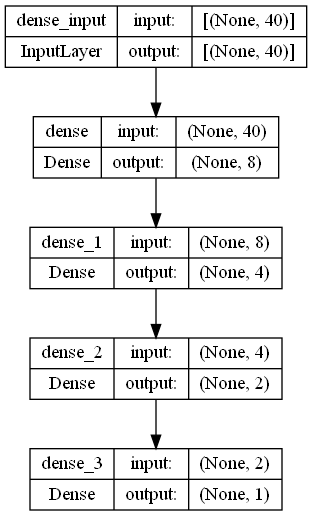

In [74]:
# Plot diagram of architecture model
tf.keras.utils.plot_model(model_seq, to_file='model_seq.png', show_shapes=True)


**Functional API**

In [75]:
# Functional API Method

# Model Process
data_in = Input(shape=(X_train_final.shape[1],))
hidden_1 = Dense(8,kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='tanh')(data_in)
hidden_2 = Dense(4,kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='tanh')(hidden_1)
hidden_3 = Dense(2,kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='tanh')(hidden_2)
concat = concatenate([data_in, hidden_3])
out = Dense(1, activation='sigmoid')(concat)

# Combine
model_fun = Model(inputs=data_in,
              outputs=out)

# Compile Model
model_fun.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In the funtional API, we use glorot normal as a default kernel initializer for each input and hidden layer and i use tanh as a default activation function.

So in this algorithm neural network consist of 1 input layer, 3 hidden layers that has neuron 8,4,2 then we concatenate the input layer with last hidden layerm,and 1 output layer that has sigmoid activation function for binary classification.

And we will use Adam optimizer as a default optimizer same as sequential API, and for reduce loss function, we will use binary cross entropy.

In [76]:
# Show summary of model
model_fun.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 8)            328         ['input_1[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 4)            36          ['dense_4[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 2)            10          ['dense_5[0][0]']                
                                                                                              

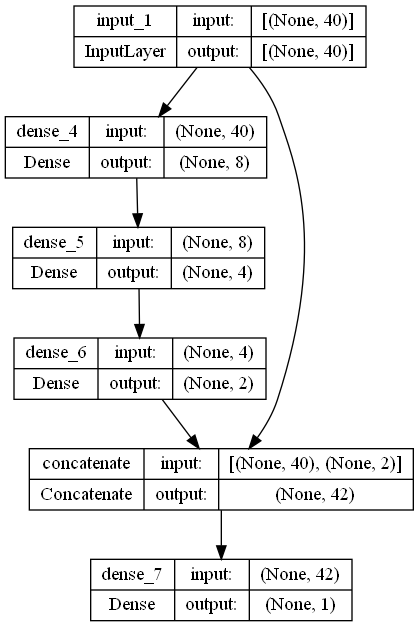

In [77]:
# Plot diagram of architecture model
tf.keras.utils.plot_model(model_fun, to_file='model_fun.png', show_shapes=True)


---
# VII. Model Training

This part take baseline model and further will be improved with Model Improvement

In [78]:
# Train Sequential Method
history_seq = model_seq.fit(X_train_pipe, epochs=40, validation_data=(X_val_pipe),
                             callbacks=[early_stopping, my_callbacks], verbose=0)

In [79]:
 #Train Functional API Method
history_fun = model_fun.fit(X_train_pipe, epochs=40, validation_data=(X_val_pipe), 
                            callbacks=[early_stopping, my_callbacks], verbose=0)

---
# VIII. Model Evaluation
In this part of process, I will try to evaluate the trained model and make conclusion out of it.

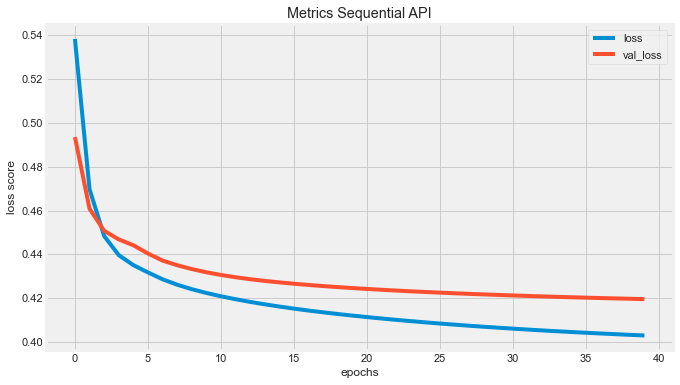

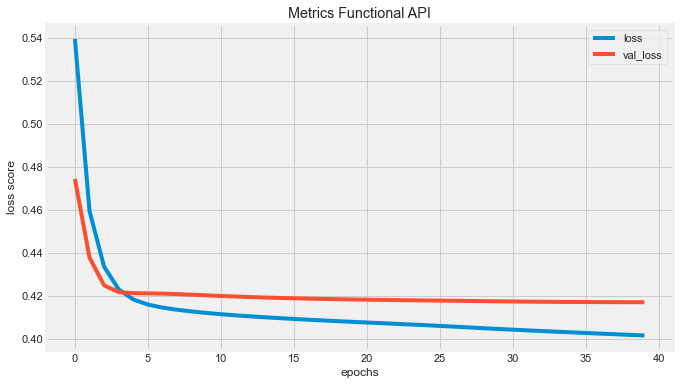

In [80]:
# Evaluation Sequential API Method vs Functional API Method

metrics_seq = pd.DataFrame(history_seq.history)
metrics_fun = pd.DataFrame(history_fun.history)


# Visualization Sequential
metrics_seq[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Funtional
metrics_fun[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

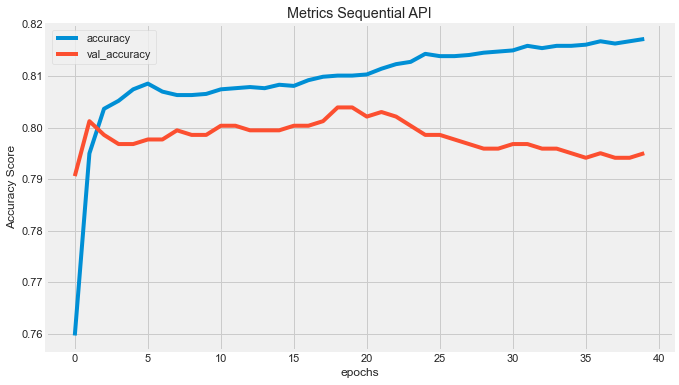

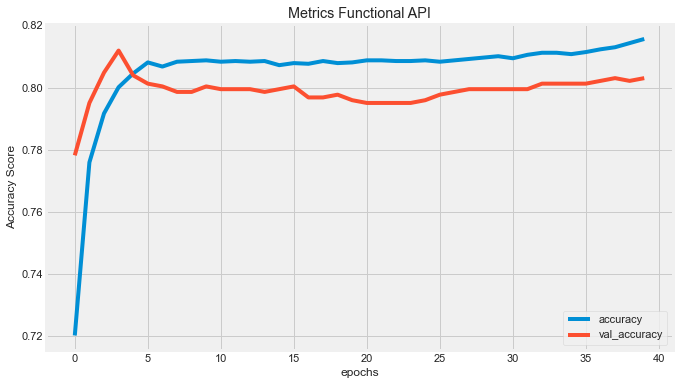

In [81]:
# Visualization Sequential
metrics_seq[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('Accuracy Score')
plt.xlabel('epochs')
plt.show()

# Visualization Funtional
metrics_fun[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('Accuracy Score')
plt.xlabel('epochs')
plt.show()

Based on a graph above:

**Sequential Method**
- get linear balance on epoch 10, as you can see graph showing stable performance
- Loss score converge at around epoch = 3, and showing stable performance
- Accuracy score converge at around epoch = 3, and showing stable performance when reach 5 epoch then seperating again after epoch 10

**Funtional Method**
- on epoch 10, as you can see graph showing stable performance
- Loss score converge at around epoch = 3, and showing stable performance then seperatin when reach 15 epoch
- Accuracy score converge at around epoch = 3, and showing stable performance when reach 8 epoch then seperating again after epoch reach 20



## Classification Report of Evaluation

**Sequential API**

In [82]:
# Classification Report of Sequential API


print('Classification Report - Sequential API')
print()

y_train_pred_seq = model_seq.predict(X_train_pipe)
y_train_pred_seq = np.where(y_train_pred_seq > 0.5, 1, 0)
print(classification_report(y_train, y_train_pred_seq))
print()
y_test_pred_seq = model_seq.predict(X_test_pipe)
y_test_pred_seq = np.where(y_test_pred_seq > 0.5, 1, 0)
print(classification_report(y_test, y_test_pred_seq))


Classification Report - Sequential API

141/141 [==============================] - 0s 720us/step
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3300
           1       0.70      0.56      0.62      1207

    accuracy                           0.82      4507
   macro avg       0.77      0.73      0.75      4507
weighted avg       0.81      0.82      0.81      4507


45/45 [==============================] - 0s 759us/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.52      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



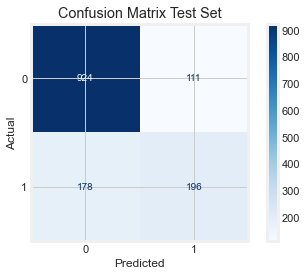

In [83]:
# Confusion Matrix of Sequential API test set 
cm = confusion_matrix(y_test,y_test_pred_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap = 'Blues')
plt.title('Confusion Matrix Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Functional API**

In [84]:
# Classification Report of Functional API


print('Classification Report - Functional API')
print()

y_train_pred_fun = model_fun.predict(X_train_pipe)
y_train_pred_fun = np.where(y_train_pred_fun > 0.5, 1, 0)
print(classification_report(y_train, y_train_pred_fun))
print()
y_test_pred_fun = model_fun.predict(X_test_pipe)
y_test_pred_fun = np.where(y_test_pred_fun > 0.5, 1, 0)
print(classification_report(y_test, y_test_pred_fun))

Classification Report - Functional API

141/141 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3300
           1       0.68      0.57      0.62      1207

    accuracy                           0.81      4507
   macro avg       0.76      0.73      0.75      4507
weighted avg       0.80      0.81      0.81      4507


45/45 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



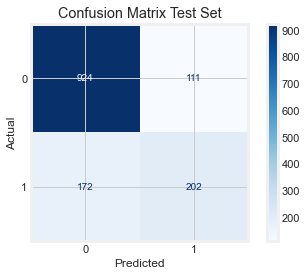

In [85]:
# Confusion Matrix of Functional API test set 
cm = confusion_matrix(y_test,y_test_pred_fun)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap = 'Blues')
plt.title('Confusion Matrix Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Based on result above, as we can see that:

**Sequential API**
- Sequential API has 87% on category '0' and 59% on category '1', and has 81% average accuracy on this algorithm.
- From confusion matrix on Sequential API has smaller False Positives than False Negatives but we have bad score on precision and recall because imbalance data that we get.

**Funtional API**
- on this Functional API we have 87% on category '0' and 61% on category '1' and has 81% on accuracy on this algorithm
- From confusion matrix on Functional API we have smaller False Positives than False Negatives but we have bad score on precision and recall because imbalance data that we get.

**Conclusion:**
- Funtional API is greater than Sequential API however the precision score is smaller than Sequential API but other factor has better score
- Sequential API has smaller False Negatives has fewer than Functional API, but has greater False Positive, so we can conclude from precision as wean to focus for predict customers who will churn.

## Model Improvement

In this sub-section we will try improve the model by adding more layers and add parameters that will reduce val_loss and increase accuracy.

In [86]:
# Sequential API Method Improvement

# Model Process
model_seq_im = Sequential()

model_seq_im.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(),input_shape=(X_train_final.shape[1], )))
model_seq_im.add(Dropout(rate=0.1))
#model_seq_im.add(BatchNormalization())

model_seq_im.add(Dense(4,activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal, kernel_regularizer=keras.regularizers.l1(0.01)))
model_seq_im.add(Dropout(rate=0.1))
model_seq_im.add(BatchNormalization())

model_seq_im.add(Dense(2,activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal()))
#model_seq_im.add(Dropout(rate=0.1))
model_seq_im.add(BatchNormalization())
model_seq_im.add(Dense(1, activation='sigmoid')) # Output
#after some train & error regularization doesnt improve significant to the results, so i decided only use on regularizer at 2nd layer

# Compile Model
model_seq_im.compile(loss='binary_crossentropy', # Binary classification
              optimizer= 'Adamax', 
              metrics=['accuracy'])

In [87]:
# Show summary of model
model_seq_im.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 328       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 4)                 36        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 batch_normalization (BatchN  (None, 4)                16        
 ormalization)                                                   
                                                                 
 dense_10 (Dense)            (None, 2)                 10        
                                                      

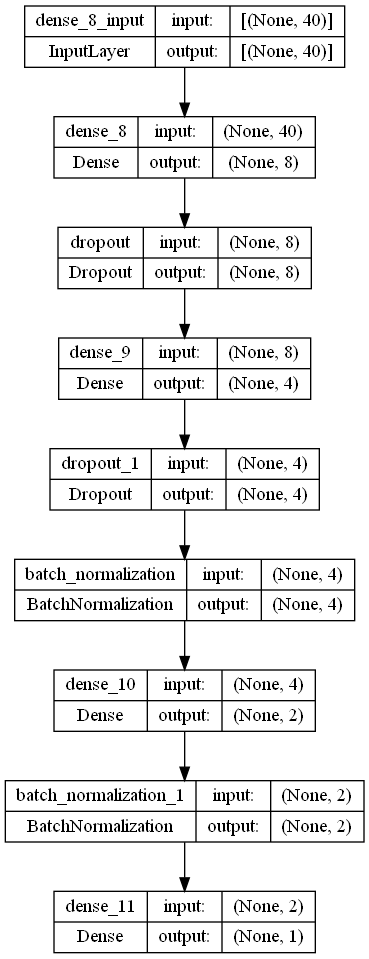

In [88]:
# Plot diagram of architecture model
tf.keras.utils.plot_model(model_seq_im, to_file='model_seq_im.png', show_shapes=True)


In this Sequential API, we will train and error for every parameters that we used Initializer of each input and hidden layers that is Random Normal as default kernel initializer. and we still used ReLU as default activation function. but which different from base model that we created before, we used Drop out with 0.1 rate on first and second hidden layers, use regularizer l1 with default value and we put Batch Normalization on the last hidden layers, before we decided used Normalization at second and last hidden layers, we put to all layers but the result makes out result make it bad. 

So from the model we used Adamax as optimizer because it will reduce the dissordered from the loss score than Adam optimizer.

In [89]:
# Functional API Method Improvement

# Model Process
data_in_im = Input(shape=(X_train_final.shape[1],))
hidden_1_im = Dense(8,kernel_initializer=tf.keras.initializers.RandomNormal(), activation='relu')(data_in_im)
hidden_2_im = Dense(4,kernel_initializer=tf.keras.initializers.RandomNormal(), activation='relu')(hidden_1_im)
hidden_3_im = Dense(2,kernel_initializer=tf.keras.initializers.RandomNormal(), activation='relu')(hidden_2_im)
concat_im = concatenate([data_in_im, hidden_3_im])
out_im = Dense(1, activation='sigmoid')(concat_im) # Output

# Combine input and out data
model_fun_im = Model(inputs=data_in_im,
              outputs=out_im)

# Compile Model
model_fun_im.compile(loss='binary_crossentropy', # Binary classification
              optimizer= 'Adamax',
              metrics=['accuracy'])

In [90]:
# Show summary of model
model_fun_im.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 8)            328         ['input_2[0][0]']                
                                                                                                  
 dense_13 (Dense)               (None, 4)            36          ['dense_12[0][0]']               
                                                                                                  
 dense_14 (Dense)               (None, 2)            10          ['dense_13[0][0]']               
                                                                                            

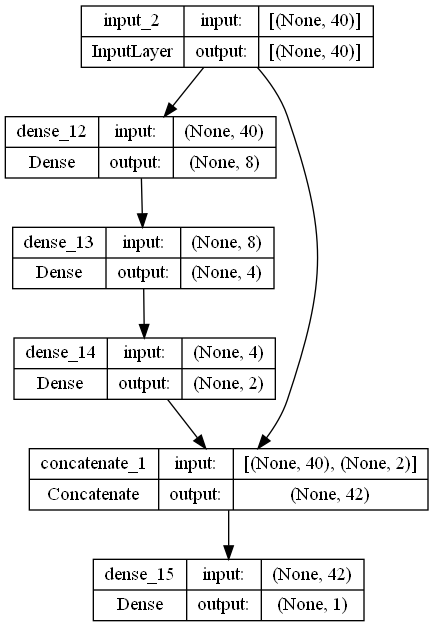

In [91]:
# Plot diagram of architecture model
tf.keras.utils.plot_model(model_fun_im, to_file='model_fun_im.png', show_shapes=True)


In the functional API Improvements, we used Random Normal as default kernel initializer, and we used ReLU as default activation function similar like Sequential API Improvements, with only changes Adamax as our optimizer.

In [92]:
# Train Sequential Method Improvement
history_seq_im = model_seq_im.fit(X_train_pipe, epochs=40, validation_data=(X_val_pipe), 
                                callbacks=[early_stopping, my_callbacks],verbose=0)

In [93]:
# Train Functional Method Improvement
history_fun_im = model_fun_im.fit(X_train_pipe, epochs=40, 
                                    validation_data=(X_val_pipe), callbacks=[early_stopping, my_callbacks]
                                    ,verbose=0)

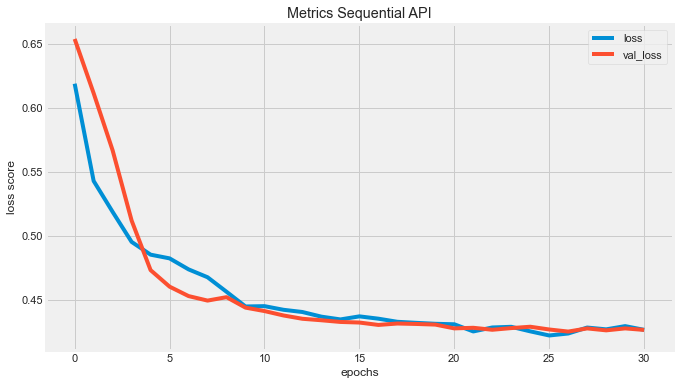

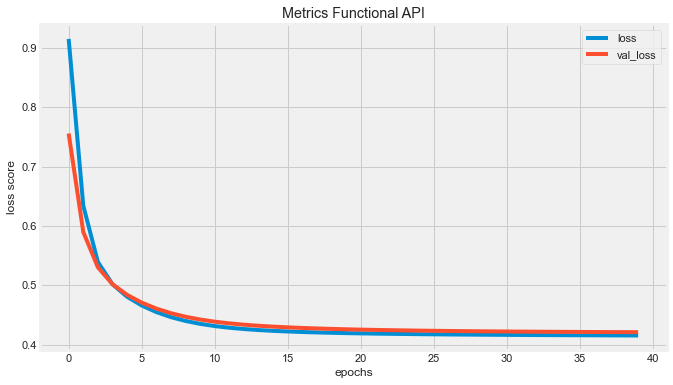

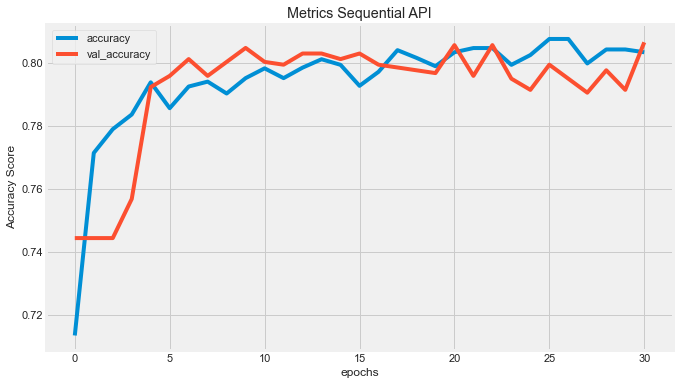

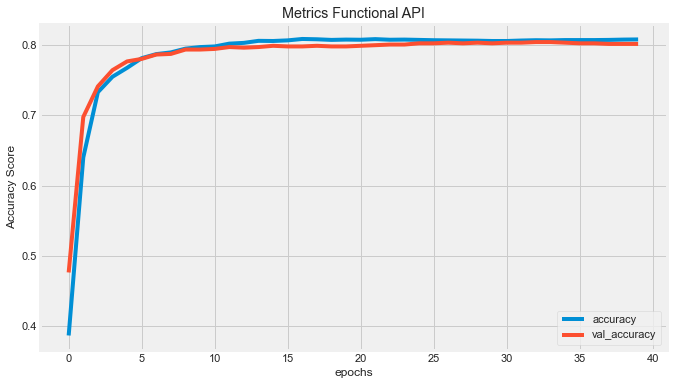

In [94]:
# Evaluation Sequential API Method vs Functional API Method
metrics_seq_im = pd.DataFrame(history_seq_im.history)
metrics_fun_im = pd.DataFrame(history_fun_im.history)

# Visualization Loss Score Sequential Improvement
metrics_seq_im[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Loss Score Funtional Improvement
metrics_fun_im[['loss','val_loss']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('loss score')
plt.xlabel('epochs')
plt.show()

# Visualization Accuracy Score Sequential Improvement
metrics_seq_im[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.title('Metrics Sequential API')
plt.ylabel('Accuracy Score')
plt.xlabel('epochs')
plt.show()

# Visualization Accuracy Score Funtional Improvement
metrics_fun_im[['accuracy','val_accuracy']].plot(figsize=(10, 6))
plt.title('Metrics Functional API')
plt.ylabel('Accuracy Score')
plt.xlabel('epochs')
plt.show()

Based on graph above, We can see that:

**Sequential API Improved**
- We have better result on loss score and accuracy score than base sequential API, after all there are converge loss score on epoch 5 and when reach epoch 20 we have stable performance, and loss score average 43%
- On accuracy score we have better result to however there are something strange on this but we have almost goodfit than base sequential API, accuracy score on average 80% and have stable performance when reach epoch 10.
- Regulizer doesnt affect performance 
- Normalizer was the most affected to reduce overfitting train and validation data
- I Changed optimizer from Adam into Adamax because this is more superior than Adam

**Functional API Improved**
- We got better on Loss Score has converge at around epoch 3, and showing stable performance after epoch 10 and we got good fit on this algorithm.
- We has converge when reach epoch 3 and get stable performance when reach epoch 10, and get accuracy around 80%
- I used relu as activator default when i change the same category that was HeNormal, the result make it bad so i changed to RandomNormal and i get the perfect results for this model.

In [95]:
# Classification Report of Sequential API Improved


print('Classification Report - Sequential API Improved')
print()

y_train_pred_seq2 = model_seq_im.predict(X_train_pipe)
y_train_pred_seq2 = np.where(y_train_pred_seq2 > 0.5, 1, 0)
print(classification_report(y_train, y_train_pred_seq2))
print()
y_test_pred_seq2 = model_seq_im.predict(X_test_pipe)
y_test_pred_seq2 = np.where(y_test_pred_seq2 > 0.5, 1, 0)
print(classification_report(y_test, y_test_pred_seq2))

Classification Report - Sequential API Improved

141/141 [==============================] - 0s 805us/step
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3300
           1       0.72      0.48      0.58      1207

    accuracy                           0.81      4507
   macro avg       0.77      0.71      0.73      4507
weighted avg       0.80      0.81      0.80      4507


45/45 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.69      0.47      0.55       374

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



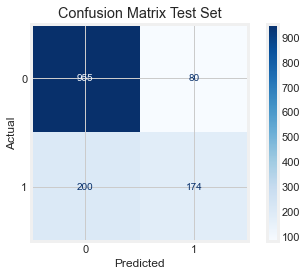

In [96]:
# Confusion Matrix of Sequential API Improved test set 
cm = confusion_matrix(y_test,y_test_pred_seq2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap = 'Blues')
plt.title('Confusion Matrix Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [97]:
# Classification Report of Functional API Improved


print('Classification Report - Functional API')
print()

y_train_pred_fun2 = model_fun_im.predict(X_train_pipe)
y_train_pred_fun2 = np.where(y_train_pred_fun2 > 0.5, 1, 0)
print(classification_report(y_train, y_train_pred_fun2))
print()
y_test_pred_fun2 = model_fun_im.predict(X_test_pipe)
y_test_pred_fun2 = np.where(y_test_pred_fun2 > 0.5, 1, 0)
print(classification_report(y_test, y_test_pred_fun2))

Classification Report - Functional API

141/141 [==============================] - 0s 737us/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3300
           1       0.67      0.55      0.60      1207

    accuracy                           0.81      4507
   macro avg       0.76      0.73      0.74      4507
weighted avg       0.80      0.81      0.80      4507


45/45 [==============================] - 0s 761us/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [106]:
# Classification Report of Functional API Improved


print('Classification Report - Functional API')
print()

y_train_pred_fun2 = model_fun_im.predict(X_train_pipe)
y_train_pred_fun2 = np.where(y_train_pred_fun2 > 0.25, 1, 0)
print(classification_report(y_train, y_train_pred_fun2))
print()
y_test_pred_fun2 = model_fun_im.predict(X_test_pipe)
y_test_pred_fun2 = np.where(y_test_pred_fun2 > 0.25, 1, 0)
print(classification_report(y_test, y_test_pred_fun2))

Classification Report - Functional API

141/141 [==============================] - 0s 786us/step
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      3300
           1       0.52      0.81      0.63      1207

    accuracy                           0.75      4507
   macro avg       0.72      0.77      0.72      4507
weighted avg       0.81      0.75      0.76      4507


45/45 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.74      1409



After changes threshold we have better result on recall score, so we can conclude threshold can make recall score balance and good for prediction to category '1' or 'Yes'

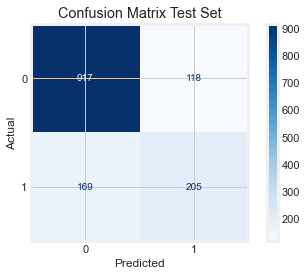

In [98]:
# Confusion Matrix of Functional API Improved test set 
cm = confusion_matrix(y_test,y_test_pred_fun2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap = 'Blues')
plt.title('Confusion Matrix Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Performance Summary of Model Improvement

Based on result above we will analyze which models that has

From the result we get after model improvements from add some parameters, we have really good score than base sequential API, and Functional API. Accuracy for both models stable on average 80-81% and loss score average 42-43%. But after we comparing both improved model, we can see Functional API Improved muich better than Sequential because we have goodfitting on this model, and because we want to focus predict Churn of customers so we need to see precision score has better however there are imbalance data on category 0 and 1. After we changes threshold values we get better recall score for category yes or 1.

So, i decided to choose Functional API Improved model as my final model.




---
# IX. Model Saving

In this part of sub-process, I will save the chosen model so that it can be deployed to the production environment.

In [99]:
# Save the best model
model_fun_im.save('model.h5')

---
# X. Model Inference

In this part of process, I will try to feed the artifical neural network model using the Inference Set and see how it perform.


In [100]:
# Load saved model
model = keras.models.load_model('model.h5')

After we loading our model, we will use the Inference Set to predict the result. Then we going to create new sample to test model.

In [114]:
# Prepare inference data for prediction
inf_set = [{'tenure' : '24', 
            'MonthlyCharges' : 100, 
            'gender' : 'Male',
            'SeniorCitizen' : 'Yes',
            'Partner' : 'Yes',
            'Dependents' : 'Yes',
            'MultipleLines' : 'Yes',
            'InternetService' : 'Yes',
             'OnlineSecurity' : 'Yes',
             'OnlineBackup' : 'Yes',
             'DeviceProtection' : 'Yes',
             'TechSupport' : 'Yes',
             'StreamingMovies' : 'Yes',
             'Contract' : 'One year',
             'PaperlessBilling' : 'Yes',
             'PaymentMethod' : 'Electronic check'}]

After we create sample for testing our model, let's go to the next step.

In [115]:
# Convert into DataFrame
df_inf_set = pd.DataFrame(inf_set)
df_inf_set

,tenure,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,24,100,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check


In [116]:
# Scaling & Encoding inference set with pipeline
df_inf_final = pipe_Pre.transform(df_inf_set)

In [117]:
# Predict Inference set
y_inf_pred = model.predict(df_inf_final)

1/1 [==============================] - 0s 14ms/step


In [118]:
# Result of Predict from covert of Target class
y_pred = np.where(y_inf_pred > 0.25, 'Yes', 'No')

y_pred.item()

'Yes'

After all, we already testing our model to predict Churn of customers, and we can see the result of our model to test will 'Yes' or 'No'.

---
# XI. Conclusion
Here all the conclusion that I get from this project

## EDA Analysis

1. On this EDA Analysis, we have imbalanced target values, which has more '0' than '1' at 73% againgst 27%
2. Some features has correlation with each other, first of all customers who likely Churn is have short term tenure.
3. Customers who was not subscribed PhoneService, InternetService and streamingTV with short term tenure 
4. Amount of MonthlyCharges and TotalCharges have affected by the customers who Churn. Higher MonthlyCharges have small chance to Stop subscription.
5. InternetService has related with  OnlineSecurity, OnlineBackup, DeviceProtection and Tech Support.

## Model Analysis

1. In the sequential API base model, i used default and simple model, so we put 3 hidden layers and used Adam optimizer, Glorot Normal as Initializer, and ReLU as Activation Function. From here we got not good not bad for loss score and accuracy score however we have some problem with overfitting.
2. When improved model for Sequential API, we try train and error for every parameter, after all we used Random Normal as Initializer, and ReLU as Activation Function which make it better than base model. because there are some gap on loss rate we used regulizer L1 on 2nd hidden layers and put Batch Normalization on last hidden layers and before that. we used Adamax as optimizer because more superior than Adam. After all we have goodfit with 80% accuracy score and loss score average 43-44%.
3. In the functional API base model, i used default and simple model, so we put 3 hidden layers and used Adam optimizer, Glorot Normal as Initializer, and tanh as Activation Function. From here we got seems good on loss score and accuracy but we have some problem with overfitting.
4. Function API Improved much better than base model, however we just change initializers to Random Normal with ReLU as Activation and Adamax as optimizer.from the best result we can see that we have goodfit with 80% accuracy score and loss score average 41-42%, and we need to focus on recall score cause we will go predict customers who likely Churn with 55% of recall score, so this model we choose as our final model.
5. Threshold can affect recall score, so if we focus to predict churn rate, after we change threshold values from 0.5 to 0.25 we got better recall score.



## Business Recomendation

- Offering promo code to customers who has not subscribed PhoneService, InternetService and streamingTV with short term tenure
- Create a bundle for Internet Service with Streaming TV & Movie Service
- Make Payment method for customer easier so can pay anywhere and anytime
- Create Discount for subscribed on long term period
- Create some bonus double speed for customer who has subscribed Internet Service.

## Refrences:
https://www.kaggle.com/code/sardiirfansyah/tensorflow-input-pipeline-tf-data
https://www.kaggle.com/code/nainapandey96/telco-customer-churn-with-imbalanced-data
